In [1]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     --------------------------------------- 0.0/38.2 MB 660.6 kB/s eta 0:00:58
     --------------------------------------- 0.0/38.2 MB 495.5 kB/s eta 0:01:17
     --------------------------------------- 0.1/38.2 MB 939.4 kB/s eta 0:00:41
     ---------------------------------------- 0.2/38.2 MB 1.1 MB/s eta 0:00:37
     ---------------------------------------- 0.2/38.2 MB 1.2 MB/s eta 0:00:32
     ---------------------------------------- 0.3/38.2 MB 1.4 MB/s eta 0:00:28
     ---------------------------------------- 0.5/38.2 MB 1.7 MB/s eta 0:00:22
      --------------------------------------- 0.6/38.2 MB 1.9 MB/s eta 0:00:21
      --------------------------------------- 0.7/38.2 MB 2.1 MB/s eta 0:00:18
      --------------------------------------- 0.9/38.2 MB 2.2 MB/s eta 0:00:18
     - --------------------------

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\user\AppData\Local\Temp\pip-install-su5njcp2\tensorflow-gpu_b436553db03f46f5b3dd74a58aded83e\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 

In [7]:
pip install opencv-python


  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [8]:
pip install matplotlib


  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)


In [2]:
pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.3.3
gast                         0.4.0
google-auth                  2.17.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.53.0
h5py                         3.8.0
idna                         3.4
ipykernel                    6.22.0
ipython                      8.12.0
jax                          0.4.8
jedi                         0.18.2
jupyter_client               8.1.0
jupyter_core                 5.3.0
keras 

In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
data_dir = 'fake_real'

In [7]:
os.listdir(data_dir)

['fake', 'real']

In [8]:
tf.data.Dataset??

In [3]:
import numpy as np 
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('fake_real')

Found 74184 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

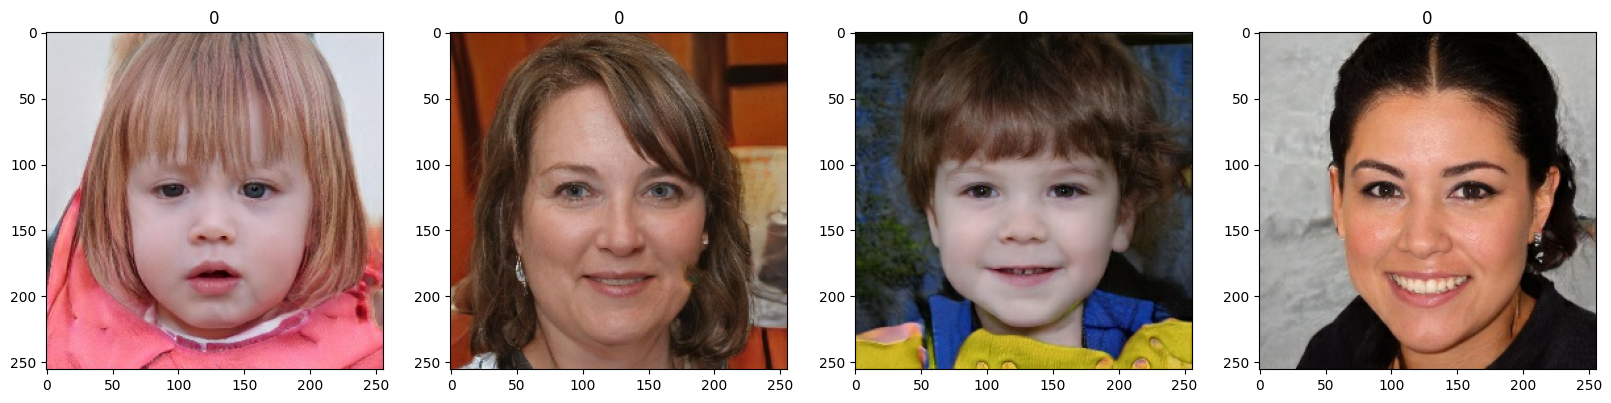

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
scaled_iterator = data.as_numpy_iterator()

In [15]:
len(data)

2319

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
from keras import regularizers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1623/1623 [==============================] - 2808s 2s/step - loss: 0.0621 - accuracy: 0.9762 - val_loss: 0.2081 - val_accuracy: 0.9288
Epoch 2/20
1623/1623 [==============================] - 2069s 1s/step - loss: 0.0583 - accuracy: 0.9784 - val_loss: 0.3386 - val_accuracy: 0.9095
Epoch 3/20
1623/1623 [==============================] - 1878s 1s/step - loss: 0.0556 - accuracy: 0.9790 - val_loss: 0.2638 - val_accuracy: 0.9184
Epoch 4/20
1623/1623 [==============================] - 1922s 1s/step - loss: 0.0555 - accuracy: 0.9793 - val_loss: 0.2482 - val_accuracy: 0.9236
Epoch 5/20
1623/1623 [==============================] - 11067s 7s/step - loss: 0.0525 - accuracy: 0.9808 - val_loss: 0.2726 - val_accuracy: 0.9225
Epoch 6/20
1623/1623 [==============================] - 1891s 1s/step - loss: 0.0495 - accuracy: 0.9822 - val_loss: 0.2418 - val_accuracy: 0.9275
Epoch 7/20
1623/1623 [==============================] - 1959s 1s/step - loss: 0.0500 - accuracy: 0.9816 - val_loss: 0.2297 

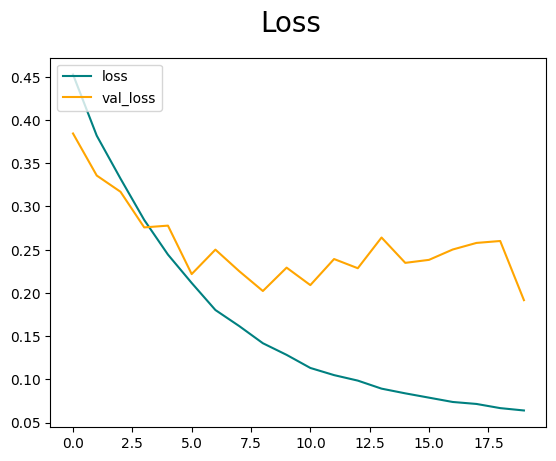

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

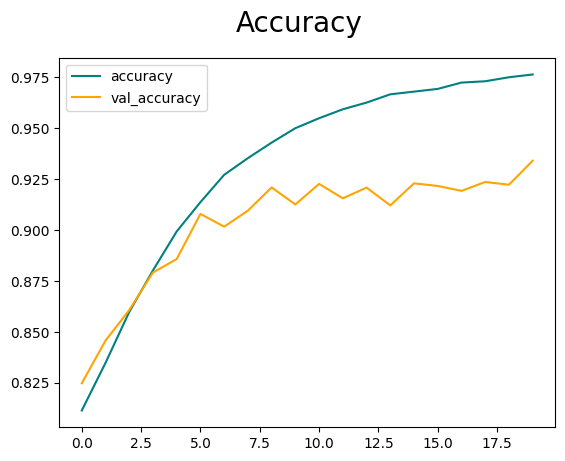

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [16]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
len(test)

232

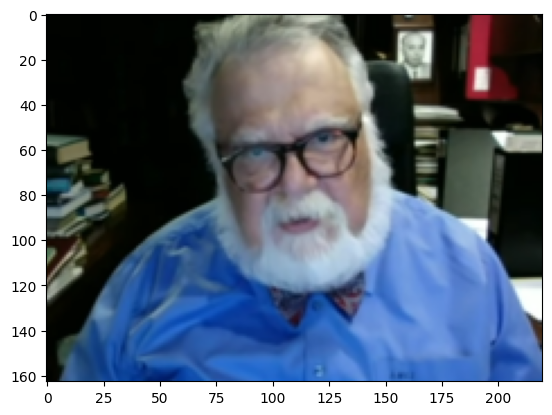

In [18]:
img = cv2.imread('human_face_8.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

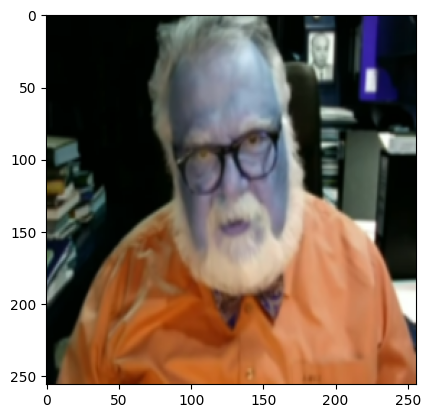

In [19]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [20]:
resize.shape

TensorShape([256, 256, 3])

In [21]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [23]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 349ms/step


In [24]:
yhat

array([[0.999858]], dtype=float32)

In [25]:
if yhat > 0.5: 
    print(f'Gerçek')
else:
    print(f'Sahte')

Gerçek


In [4]:
from tensorflow.keras.models import load_model

In [588]:
model.save(os.path.join('models','fake_real_40_epoch.h5'))

In [5]:
new_model = load_model(os.path.join('models','fake_real_40_epoch.h5'))

In [19]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 190ms/step


In [20]:
yhatnew

array([[0.93327004]], dtype=float32)

In [21]:
if yhatnew > 0.5: 
    print(f'Gerçek')
else:
    print(f'Sahte')

Gerçek
